# Single Qubit Time Dependent Hamiltonian Simulation 
Adapted from Townsend, "A Modern Approach to Quantum Mechanics," Section 4.4 (Magnetic Resonance)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# for 3d interactive display of the bloch sphere
from kaleidoscope import bloch_sphere
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
from qiskit.quantum_info import Statevector, partial_trace

Define the initial state to: $ |\phi(0)\rangle =   |0\rangle$.
Define the Hamiltonian as given by sec 4.3 $ H = w_0\sigma_z + w_1 \cos(wt) \sigma_x$.

In [38]:
initial_state = basis(2, 0)
w_0 = np.pi
w = w_0
w_1 = w_0/5
H0 = .5 * w_0 * sigmaz() # time independent term
H1 =.5 * w_1 * sigmax() # time dependent term

def H1_coeff(t, args):
    return np.cos(w * t)

args = {'w': w}

H = [H0, [H1, H1_coeff]]



In [39]:
# define state on which to project
s_project = [sigmax(), sigmay(), sigmaz()]

# define time points
times = np.linspace(0.0, 12*np.pi/w1, 1000)

# run the simulation- to get expectation values we pass s_project
expct_result = sesolve(H, initial_state, times, s_project, args = args)# add progress_bar=True to see progress
state_result = sesolve(H, initial_state, times, args = args)# add progress_bar=True to see progress

sx, sy, sz = expct_result.expect
states = state_result.states


In [40]:
# make a list of [x, y, z] vectors
x = []
y = []
z = []
points = []
i = 0
for state in states:
    x.append((state.dag()*sigmax()*state).full()[0][0])
    y.append((state.dag()*sigmay()*state).full()[0][0])
    z.append((state.dag()*sigmaz()*state).full()[0][0])
    points.append([sx[i], sy[i], sz[i]])
    i = i + 1

# print(points)

# to change the vectors color from lighter to darker color as time progress
cm = LinearSegmentedColormap.from_list('graypurple', ["#999999", "#AA00FF"])
vectors_color = [rgb2hex(cm(kk)) for kk in np.linspace(-1,1,len(points))]

# # draw the bloch sphere
bloch_sphere(points, vectors_color = vectors_color)

We can also plot it as points on the Bloch sphere:

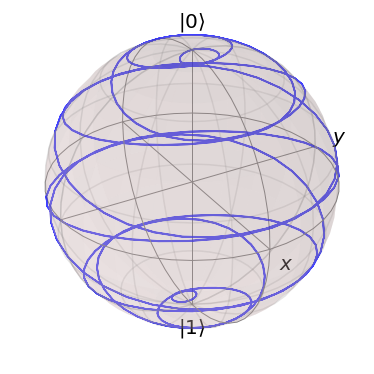

In [42]:
b = Bloch()
b.add_points([sx,sy,sz], meth = 'l')
b.view = [-120,30]
b.show()

The expectation for $ \sigma_z $ is:

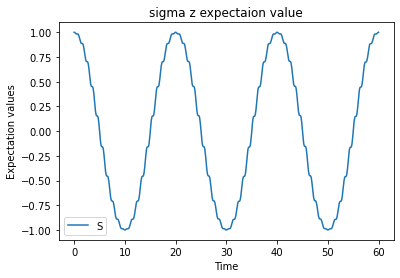

In [45]:
# expectaion plot
fig, ax = plt.subplots() 
ax.set_title("sigma z expectaion value")
ax.plot(expct_result.times, sz)
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-z")) 
plt.show() 




The probability of $ \sigma_z $ up and $\sigma_z$ down are: $ P(\sigma_z up) = \left (\langle z+ | \phi(t) \rangle \right)^2 $ 

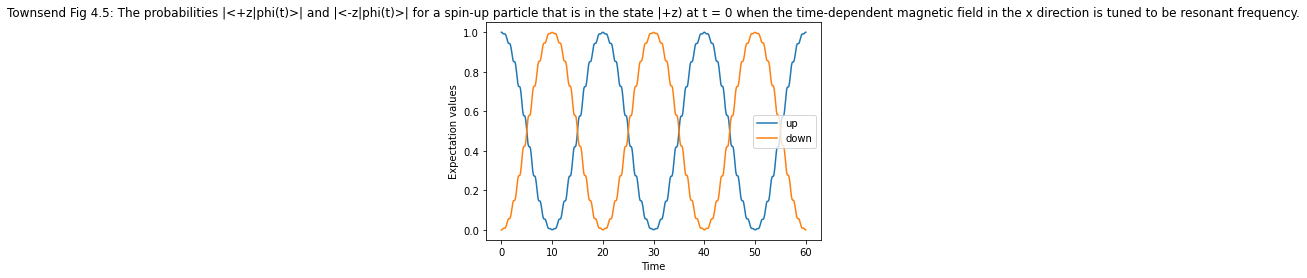

In [49]:
z_up_prob = []
z_down_prob = []
for state in states:
    prob = ((basis(2, 0).dag() * state).norm())**2
    z_up_prob.append(prob)
    z_down_prob.append(1 - prob)
fig1, ax1 = plt.subplots() 
ax1.set_title("Townsend Fig 4.5: The probabilities |<+z|phi(t)>| and |<-z|phi(t)>| for a spin-up particle that is in the state |+z) at t = 0 when the time-dependent magnetic field in the x direction is tuned to be resonant frequency.")
ax1.plot(times,  z_up_prob)
ax1.plot(times,  z_down_prob)
ax1.set_xlabel('Time') 
ax1.set_ylabel('Expectation values') 
ax1.legend(("up", "down")) 
plt.show() 